**Task 3**

a) To identify the least preferred asset, plot the returns and deviations of all assets. The one located furthest to the southeast (IV quadrant) is less desirable, as it offers lower returns relative to its high risk (greater deviation). This asset has a poor return-risk profile, providing too little return for its level of risk.



In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate portfolio performance (return and volatility)
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility


$$ 
\textbf{Portfolio Return:} \\
\text{return} = \sum_{i=1}^{N} (\mu_i \cdot w_i) \tag{3.1}
$$

- \( \mu_i \): The expected return of the \(i\)-th asset, representing the average return you anticipate from that asset over a given period.  
- \( w_i \): The weight of the \(i\)-th asset in the portfolio, which is the fraction of the total portfolio invested in that asset.  
- \( N \): The total number of assets in the portfolio, indicating its diversification level.

$$ 
\textbf{Portfolio Volatility:} \\
\text{volatility} = \sqrt{ \mathbf{w}^T \cdot \mathbf{\Sigma} \cdot \mathbf{w} } \tag{3.2}
$$

- \( \mathbf{w} \): The vector of portfolio weights, where each element represents the proportion invested in each asset.  
- \( \mathbf{\Sigma} \): The covariance matrix of asset returns, containing variances of individual assets and covariances between pairs of assets.


The following function, `minimize_volatility`, is designed to optimize a portfolio by finding the asset weights that minimize its volatility (standard deviation). The optimization has two key constraints, of them having expected return match a specified target return and ensuring the portfolio is fully invested. The minimize function attempts to find the optimal weights (w) that minimize the volatility of the portfolio. It uses the Sequential Least Squares Programming (SLSQP) method to find the weights while respecting the bounds on the weights (between 0 and 1) and ensuring the portfolio satisfies the return and weight sum constraints. The result of this optimization results in the variable result.

In [70]:

# Function to minimize volatility with short sales allowed
def minimize_volatility(weights, mean_returns, cov_matrix, target_return):
    cons = ({'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[0] - target_return},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = None  # No bounds for weights (short sales allowed)
    result = minimize(lambda x: portfolio_performance(x, mean_returns, cov_matrix)[1], weights, 
                      method='SLSQP', bounds=bounds, constraints=cons)
    return result

    # Bounds for each weight (between 0 and 1)
    bounds = [(0, 1) for _ in range(len(mean_returns))]

    # Define constraints as a dictionary list
    constraints = [{'type': 'eq', 'fun': constraint_return},
                   {'type': 'eq', 'fun': constraint_weights}]

    # Minimize the portfolio's volatility (standard deviation)
    result = minimize(lambda w: portfolio_performance(w, mean_returns, cov_matrix)[1],
                      weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

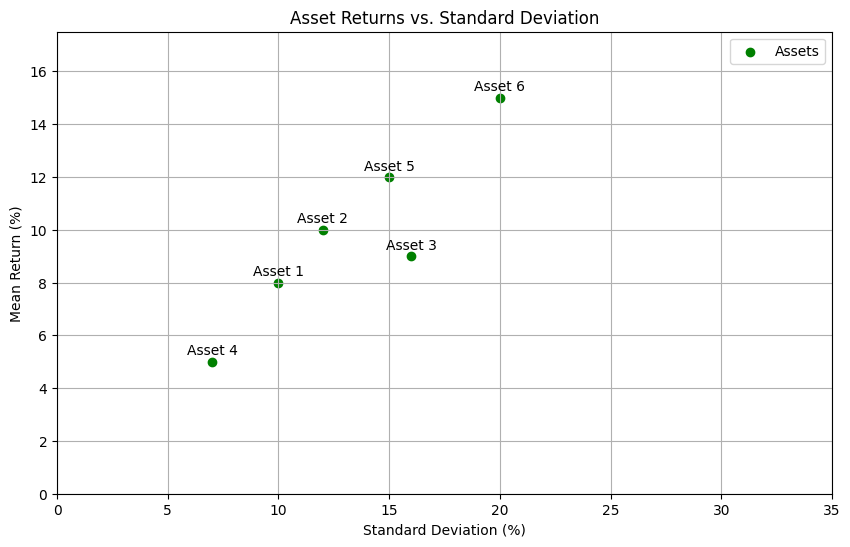

In [71]:
# Data: Mean returns and standard deviations (volatilities) of the six assets
asset_returns = np.array([0.08, 0.1, 0.09, 0.05, 0.12, 0.15])  # Asset returns
asset_stddevs = np.array([0.10, 0.12, 0.16, 0.07, 0.15, 0.20])  # Asset standard deviations
# Plot the six assets
plt.figure(figsize=(10, 6))
plt.scatter(asset_stddevs * 100, asset_returns * 100, color='green', label='Assets')

# Annotate each of the six assets
asset_labels = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5', 'Asset 6']
for i, txt in enumerate(asset_labels):
    plt.annotate(txt, (asset_stddevs[i] * 100, asset_returns[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Asset Returns vs. Standard Deviation")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 35)
plt.ylim(0, 17.5)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Asset 3 is the least desirable because it offers a relatively high standard deviation (risk) of nearly 16% while providing a return of around 9%, which is lower than other assets with similar or even less risk, meaning that Asset 3 is the least efficient in terms of its return-to-risk ratio.

b) In this case, we define minimize_volatility_no_short with bounds for each weigh of the corresponding asset in the matrix of weights

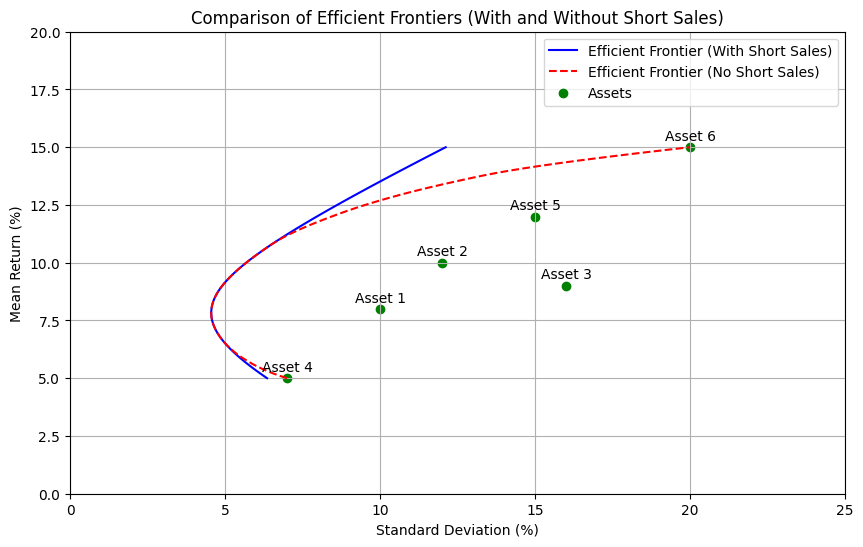

In [68]:
# Function to minimize volatility with short sales not allowed (non-negative weights)

def minimize_volatility_no_short(weights, mean_returns, cov_matrix, target_return):
    constraints = [{'type': 'eq', 'fun': lambda w: portfolio_performance(w, mean_returns, cov_matrix)[0] - target_return},
                   {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    
    # Set bounds for each weight between 0 and 1 (no short sales allowed)
    bounds = [(0, 1) for _ in range(len(mean_returns))]
    
    # Minimize the volatility (portfolio risk)
    result = minimize(lambda w: portfolio_performance(w, mean_returns, cov_matrix)[1],  # Minimize the risk (volatility)
                      weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result

# Data: Mean returns and standard deviations (volatilities) of the six assets
asset_returns = np.array([0.08, 0.1, 0.09, 0.05, 0.12, 0.15])  # Asset returns
asset_stddevs = np.array([0.10, 0.12, 0.16, 0.07, 0.15, 0.20])  # Asset standard deviations

# Covariance matrix (assuming no correlations between assets for simplicity)
cov_matrix = np.diag(asset_stddevs ** 2)

# Number of assets
num_assets = len(asset_returns)

# Initial portfolio weights (equal distribution)
weights = np.ones(num_assets) / num_assets

# Generate efficient frontier with short sales allowed
target_returns = np.linspace(min(asset_returns), max(asset_returns), 100)
efficient_vols = []
for r in target_returns:
    result = minimize_volatility(weights, asset_returns, cov_matrix, r)
    efficient_vols.append(result.fun)

# Generate efficient frontier without short sales
efficient_vols_no_short = []
for r in target_returns:
    result = minimize_volatility_no_short(weights, asset_returns, cov_matrix, r)
    efficient_vols_no_short.append(result.fun)

# Plot both efficient frontiers for comparison
plt.figure(figsize=(10, 6))

# Efficient frontier with short sales allowed
plt.plot(np.array(efficient_vols) * 100, target_returns * 100, 'b-', label='Efficient Frontier (With Short Sales)')

# Efficient frontier without short sales
plt.plot(np.array(efficient_vols_no_short) * 100, target_returns * 100, 'r--', label='Efficient Frontier (No Short Sales)')

# Plot the six assets
plt.scatter(asset_stddevs * 100, asset_returns * 100, color='green', label='Assets')

# Annotate each of the six assets
asset_labels = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5', 'Asset 6']
for i, txt in enumerate(asset_labels):
    plt.annotate(txt, (asset_stddevs[i] * 100, asset_returns[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Comparison of Efficient Frontiers (With and Without Short Sales)")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 35)
plt.ylim(0, 17.5)
plt.legend()
plt.grid(True)
plt.show()

In the no short sales scenario (red dashed line), the optimizer can only assign positive weights between 0 and 1. For higher return targets, it allocates more to Asset 6 because it offers the highest return. Without the ability to short-sell and offset risk, the optimizer depends heavily on Asset 6 to achieve higher returns. Since there’s no correlation between assets, the optimizer favors Asset 6, as other portfolios might achieve similar returns but with higher risk.